# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Нейронные сети.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.





**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов
* Задача 2 &mdash; 30 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 60 баллов


In [ ]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, palette='Set2')
%matplotlib inline

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture4.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html" target="_blank">обучающий ноутбук</a> с занятия по нейронным сетям.

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

Рассмотрим двухслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронную можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$



**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

рисунок прикреплен в pdf-ке.

**2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
$$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.

**2.1.** Начнем с производной MSE по выходам сети
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = \frac{2}{n}(\widehat{y}(X_i) - Y_i)$$

**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = u_h(X_i)$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = 1$$

Также выпишем производные выходов сети по входам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = w_{2h}$$

Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial w_{2h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial b_2}$$

$$\frac{\partial\:\text{MSE}}{\partial u_h} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial u_h}$$

**2.2.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$

$$\frac{\partial\:\sigma(x)}{\partial x} = \frac{{e}^{-x}}{\left({{e}^{-x}+1}\right)^{2}} = \sigma^2(x) {e}^{-x} = \sigma^2(x) (1 + {e}^{-x} - 1) = \sigma^2(x) (\sigma^{-1}(x) - 1) = \sigma(x) - \sigma^2(x)$$

Теперь возьмем производные выходов первого слоя по его параметрам

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = \frac{\partial \sigma(w_{1h}X_i + b_{1h})}{\partial (w_{1h}X_i + b_{1h})} \frac{\partial(w_{1h}X_i + b_{1h})}{\partial w_{1h}} = \sigma'(w_{1h}X_i + b_{1h}) X_i$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = \frac{\partial \sigma(w_{1h}X_i + b_{1h})}{\partial (w_{1h}X_i + b_{1h})} \frac{\partial(w_{1h}X_i + b_{1h})}{\partial b_{1h}} = \sigma'(w_{1h}X_i + b_{1h})$$

Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial u_h(X_i)} \frac{\partial u_h(X_i)}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial u_h(X_i)} \frac{\partial u_h(X_i)}{\partial b_{1h}}$$

**3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

Так как нас просят сравнить правила обновления параметров, то выпишем в случае обычного градиентного спуска:

$$\theta_t = \theta_{t - 1}- \eta ∇(\frac{1}{n}\sum_{i = 1}^nL(\widehat{y}_{\theta_{t - 1}}(X_i), Y_i)$$

Если выборка очень большая, то подсчет будет занимать очень много времени. Поэтому будем использовать SGD:

$$\theta_t = \theta_{t - 1}- \eta ∇(\frac{1}{|I|}\sum_{i \in I}L(\widehat{y}_{\theta_{t - 1}}(X_{i}), Y_{i})$$

где $I$ - подмножество случайно выбранных индексов(т.е. батч), а $|I|$ - его мощность

**Вывод:**
Так как подсчет градиентов для каждого параметра требует очень много времени при большом числе параметров(т.е. в нейросетях) и большом числе данных, то удобно использовать метод обратного распространения ошибки, что мы сделали в этой задаче для 3ей.

---
### Задача 2.

Напишите нейронную сеть из задачи 1 с помощью библиотеки `pytorch`, используя Sequential-стиль. Перед выполнением задачи рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html#3.-Готовые-модули-из-PyTorch" target="_blank">ноутбук</a> с занятия. Функция активации реализована как `torch.nn.Sigmoid`.

*Внимание.* Для выполнения задачи потребуется установить библиотеку `pytorch`. Альтернативный вариант &mdash; выполнение в <a href="https://colab.research.google.com" target="_blank">Google Colab</a>. Учитывайте, что при длительном бездействии Colab может сам завершить работу ядра.

In [82]:
import torch
from torch import nn

model = nn.Sequential(
    nn.Linear(in_features=1, out_features=2),
    nn.Sigmoid(),
    nn.Linear(in_features=2, out_features=1)
)

model

Sequential(
  (0): Linear(in_features=1, out_features=2, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=2, out_features=1, bias=True)
)

Для лучшего обучения выберем разные learning rates для разных обучаемых параметров(так как первый раз при обучении я столкнулся с плохим приближением параболы(зависимость y от x) при n = 10^6). Для этого выведем их:

In [83]:
for name, param in model.named_parameters():
    print(name)
    print(param.data)

0.weight
tensor([[-0.9364],
        [-0.5162]])
0.bias
tensor([ 0.8914, -0.5787])
2.weight
tensor([[0.6880, 0.2028]])
2.bias
tensor([-0.0304])


In [84]:
from torch.optim.lr_scheduler import MultiStepLR

optimizer = torch.optim.Adam([                                     # using Adam optimizer
                {'params': [model[0].weight, model[2].weight]},
                {'params': [model[0].bias, model[2].bias], 'lr': 0.05}
            ], lr=0.07)
scheduler = MultiStepLR(optimizer, milestones=[1000, ], gamma=0.1)   # reduce lr by 0.1 after 1000 epochs

optim_func = nn.MSELoss()

Сгенерируем данные. Возьмите какую-либо нелинейную функцию $y(x)$.

In [85]:
sample_size = int(1e3)
X = sps.norm.rvs(size=(sample_size, 1))
y = np.squeeze(np.exp(X))

assert y.shape == (sample_size,)

Выберем для проверки несложную функцию - exp(X). Так как в данном случае нам просто важно проверить работоспособность и понять, приближается ли функция. А для более сложных зависимостей используем 3 задачу, где требуется выбрать еще одну зависимость. Как раз исследуем, как приближаются более сложные функции

In [86]:
X_new = torch.from_numpy(X).reshape(-1, 1)
X_new = X_new.to(torch.float32)
y_new = torch.from_numpy(y).reshape(-1, 1)
y_new = y_new.to(torch.float32)
X_new.shape, y_new.shape

(torch.Size([1000, 1]), torch.Size([1000, 1]))

так как дальше нас просят посчитать MSE на тестовой части данных, то разделим их

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.33, random_state=42)

Обучите нейросеть на этих данных. Используйте код с занятия.

In [88]:
from IPython.display import clear_output

def show_progress(x, y, y_pred, x_legend, y_legend, loss):
    y_pred = y_pred.detach()
    loss = loss.item()
    clear_output(wait=True)

    plt.figure(figsize=(10, 7))
    func = plt.scatter(x, y, alpha=0.8, linewidth=2, color='orange', label='function')
    predicted = plt.scatter(x, y_pred, linewidth=0.5, alpha=0.3, label='predicted')
    plt.xlabel(x_legend)
    plt.title(y_legend)
    plt.legend((func, predicted), ('function', 'predicted'), scatterpoints=1,
               loc='upper left')
    plt.show()

    print(f"MSE = {loss:.3f}")

In [89]:
def learning(inp_model, optimizer, optim_func, X_train, Y_train, num_iter = 100):
    for i in range(num_iter):
        y_pred = inp_model(X_train)
        loss = optim_func(y_pred, Y_train)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        scheduler.step()

        if (i + 1) % 50 == 0:
            show_progress(X_train.cpu(), Y_train.cpu(), y_pred.cpu(), 'x_value', 'y_value', loss)

    return inp_model

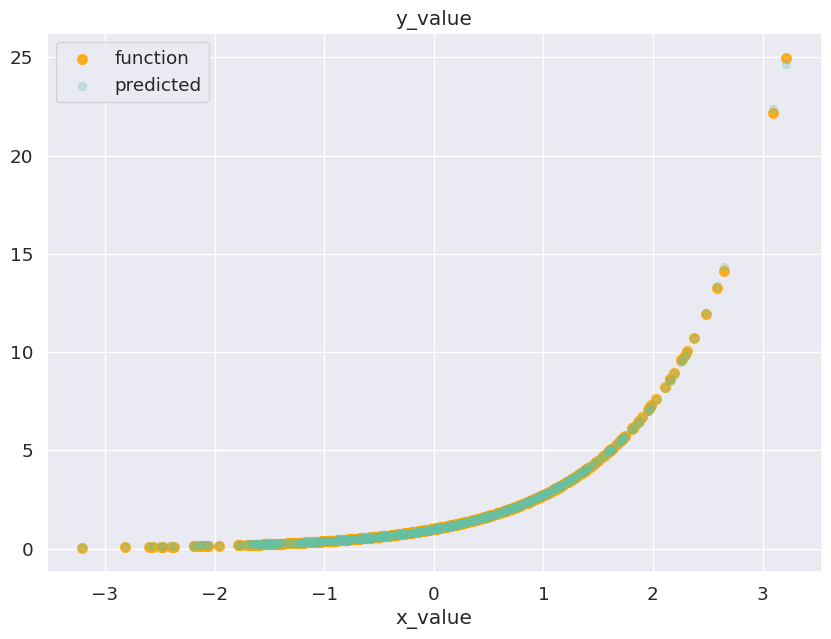

MSE = 0.001


In [90]:
model = learning(model, optimizer, optim_func, X_train, y_train, 10000)

with torch.no_grad():
    y_pred_seq = model(X_train)
loss_seq = optim_func(y_pred_seq, y_train)

Визуализируйте предсказания и посчитайте MSE на тестовой части данных.

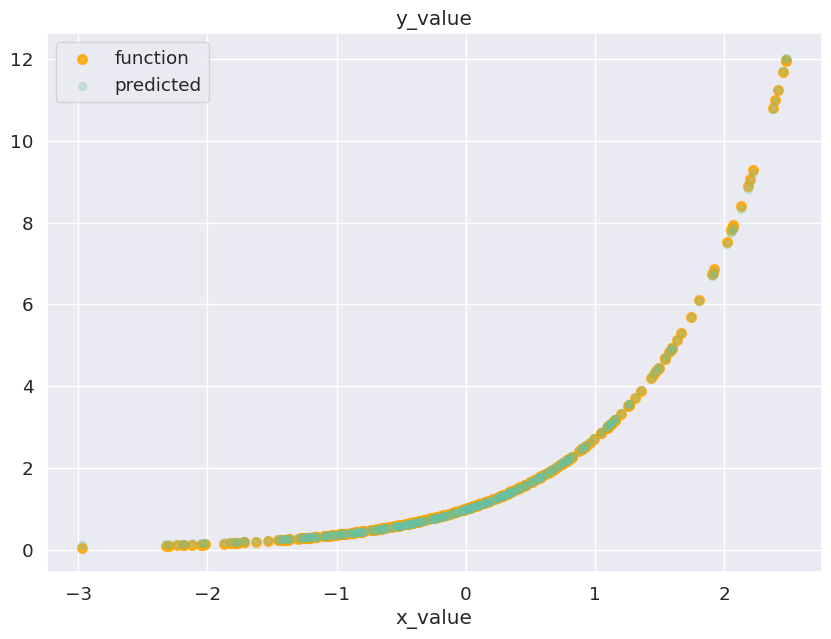

MSE = 0.000


In [91]:
with torch.no_grad():
    y_pred = model(X_test)

loss = optim_func(y_pred, y_test)
show_progress(X_test, y_test, y_pred, 'x_value', 'y_value', loss)

**Вывод:** \
1) Использование нейросетей помогает приближать нелинейные зависимости. Что очень удобно, так как не надо выдумывать новые нелинейные признаки, чтобы работала линейная регрессия. С другой стороны, приходится подбирать lr и иногда даже начальные значения параметров, чтобы быстрее происходило обучение(т.е. по сравнению с линейной регрессией обучение происходит сильно дольше из-за большего числа параметров и вычислений)\
2) Также удобно использовать scheduler = MultiStepLR(...), чтобы вначале быстро продвинуться в правильном направлении, а потом с маленьким lr спускаться к минимуму Loss функции\
3) Я выводил график каждые 50 итераций и было заметно, что при маленьких значениях эпох функция, которую рисует сетка - сигмоида(так как мы использовали сигмоиду в качестве функции активации)

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

Теперь реализуйте класс нейронной сети из задачи 1 в стиле scikit-learn, например, см. <a href="https://miptstats.github.io/courses/ad_fivt/task3.html#Задача-4." target="_blank">шаблон класса задачи 4 из задания 3</a>. Предусмотрите возможность обучения по случайным батчам. При реализации можно использовать только библиотеку `numpy`.

In [119]:
import typing
from typing import Optional

class SimpleNeuralNetwork:
    def __init__(self,
                 learning_rate: float | dict = 0.01,
                 batch_size : Optional[int] = None,
                 W1: Optional[np.ndarray] = None,
                 b1: Optional[np.ndarray] = None,
                 W2: Optional[np.ndarray] = None,
                 b2: Optional[np.ndarray] = None):
        self.batch_size = batch_size

        if type(learning_rate) == float:
            self.learning_rate = {'w1' : learning_rate, 'b1' : learning_rate,
                                  'w2' : learning_rate, 'b2' : learning_rate}
        else:
            self.learning_rate = learning_rate
        if W1 == None:
            self.W1 = np.random.randn(1, 2)
        else:
            self.W1 = W1
        if b1 == None:
            self.b1 = np.random.randn(1, 2)
        else:
            self.b1 = b1
        if W2 == None:
            self.W2 = np.random.randn(2, 1)
        else:
            self.W2 = W2
        if b2 == None:
            self.b2 = np.random.randn(1, 1)
        else:
            self.b2 = b2


    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))


    def __sigmoid_derivative(self, x):
        return np.exp(x)/((np.exp(x) + 1)**2)


    def __forward_pass(self, X: np.ndarray):
        u = self.__sigmoid(np.dot(X, self.W1) + self.b1)
        y_pred = np.dot(u, self.W2) + self.b2
        return y_pred, u


    def __backward_pass(self, y_pred: np.ndarray, y_true: np.ndarray,
                        u: np.ndarray, X: np.ndarray):
        loss_ypred_deriv = 2 * (y_pred - y_true) / len(y_pred)
        ypred_w2_deriv = u
        ypred_b2_deriv = np.ones((len(y_pred), 1))
        ypred_u_deriv = np.repeat(self.W2.T, len(y_pred), axis=0)

        loss_b2_deriv = loss_ypred_deriv.T @ ypred_b2_deriv
        loss_w2_deriv = np.transpose(loss_ypred_deriv.T @ ypred_w2_deriv)
        loss_u_deriv = loss_ypred_deriv.T @ ypred_u_deriv

        u_w1_deriv = self.__sigmoid_derivative(X @ self.W1 + self.b1) * X
        u_b1_deriv = self.__sigmoid_derivative(X @ self.W1 + self.b1)

        loss_b1_deriv = np.diag(np.transpose(loss_ypred_deriv * ypred_u_deriv) @ u_b1_deriv)
        loss_b1_deriv = np.reshape(loss_b1_deriv, (1, 2))
        loss_w1_deriv = np.diag(np.transpose(loss_ypred_deriv * ypred_u_deriv) @ u_w1_deriv)
        loss_w1_deriv = np.reshape(loss_w1_deriv, (1, 2))

        self.W2 -= self.learning_rate['w2'] * loss_w2_deriv    # upgrade parametres
        self.b2 -= self.learning_rate['b2'] * loss_b2_deriv
        self.W1 -= self.learning_rate['w1'] * loss_w1_deriv
        self.b1 -= self.learning_rate['b1'] * loss_b1_deriv


    def __MSE(self, y_true: np.ndarray, y_pred: np.ndarray):
        assert np.shape(y_true) == np.shape(y_pred), 'different sizes in MSE'

        diff = np.transpose(y_true - y_pred) @ (y_true - y_pred)
        return diff / len(y_pred)


    def fit(self, X: np.ndarray, y: np.ndarray, epochs: int=1000):
        for epoch in range(epochs):
            if self.batch_size != None:
                rand_indices = np.random.choice(np.arange(len(y)), self.batch_size, replace=False) # False replace(indices don't repeat)
            else:
                rand_indices = np.arange(len(y))
            X_new = X[rand_indices]
            y_new = y[rand_indices]                     # batch realization

            y_pred, u = self.__forward_pass(X_new)     # forward pass
            loss = self.__MSE(y_new, y_pred)
            self.__backward_pass(y_pred, y_new, u, X_new)    # backward pass

            if (epoch + 1) % 50 == 0:
                show_progress(torch.from_numpy(X_new), torch.from_numpy(y_new), torch.from_numpy(y_pred), 'x_value', 'y_value', loss)


    def predict(self, X: np.ndarray):
        y_pred, u = self.__forward_pass(X)
        return y_pred

Обучите нейронную сеть на рассмотренных ранее данных, а также простую линейную регрессию. Для линейной регрессии стоит взять реализацию из `sklearn`. Сравните эту нейросеть, линейную регрессию и pytorch-сеть из задачи 2.

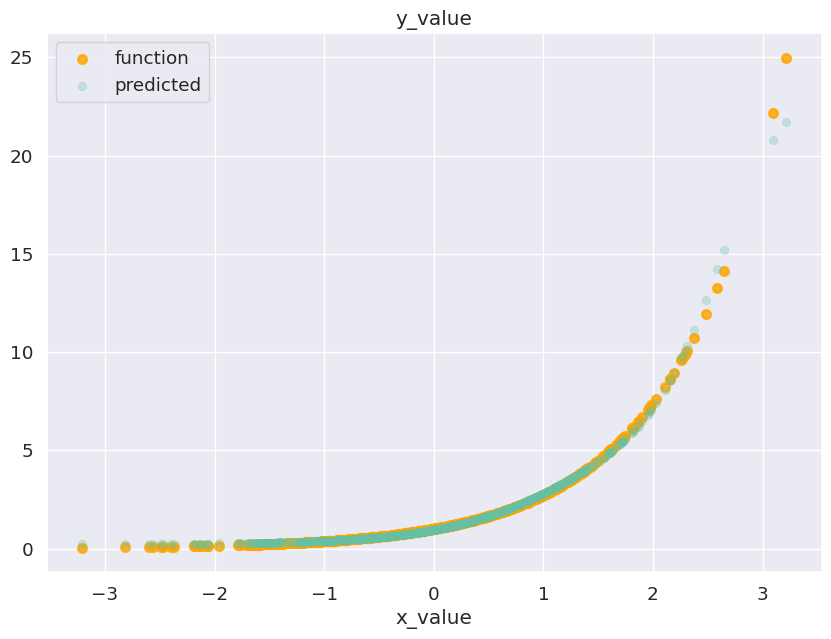

MSE = 0.027


In [95]:
model2_exp = SimpleNeuralNetwork(learning_rate=0.04)

model2_exp.fit(X_train.numpy(), y_train.numpy(), epochs = 10000)

y_pred_self = torch.from_numpy(model2_exp.predict(X_train.numpy()))
loss_self = optim_func(y_pred_self, y_train)

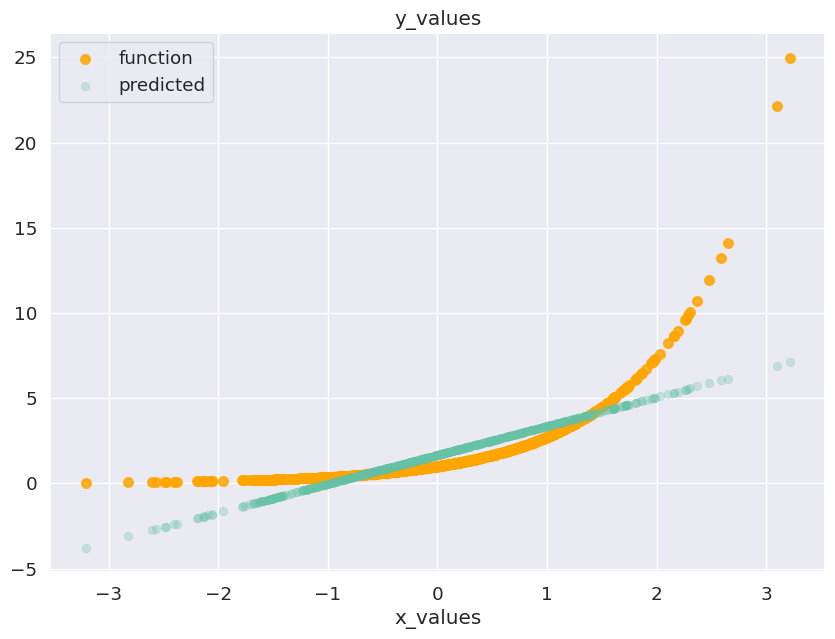

MSE = 1.874


In [97]:
from sklearn.linear_model import LinearRegression

model_lin_exp = LinearRegression().fit(X_train.numpy(), y_train.numpy())

y_pred_linear = torch.from_numpy(model_lin_exp.predict(X_train.numpy()))
loss_linear = optim_func(y_pred_linear, y_train)

show_progress(X_train, y_train, y_pred_linear, 'x_values', 'y_values', loss_linear)

Теперь сравним все модели на одном графике.

In [98]:
def show_result(y_pred_arr, x, y, x_legend, y_legend, loss_arr):
    plt.figure(figsize=(10, 7))
    func = plt.scatter(x, y, alpha=0.8, linewidth=2, color='orange', label='function')
    predicted_seq = plt.scatter(x, y_pred_arr[0].detach(), linewidth=0.5, alpha=0.3, label='predicted', color='green')
    predicted_self = plt.scatter(x, y_pred_arr[1].detach(), linewidth=0.5, alpha=0.3, label='predicted', color='blue')
    predicted_linear = plt.scatter(x, y_pred_arr[2].detach(), linewidth=0.5, alpha=0.3, label='predicted', color='purple')

    plt.xlabel(x_legend)
    plt.title(y_legend)
    plt.legend((func, predicted_seq, predicted_self, predicted_linear),
               ('function', 'predicted_pytorch', 'predicted_self_NN', 'predicted_Linear'),
               scatterpoints=1, loc='upper left')
    plt.show()

    print(f"Pytorch Model MSE = {loss_arr[0].item():.3f}")
    print(f"Self NN Model MSE = {loss_arr[1].item():.3f}")
    print(f"Linear Model MSE = {loss_arr[2].item():.3f}")

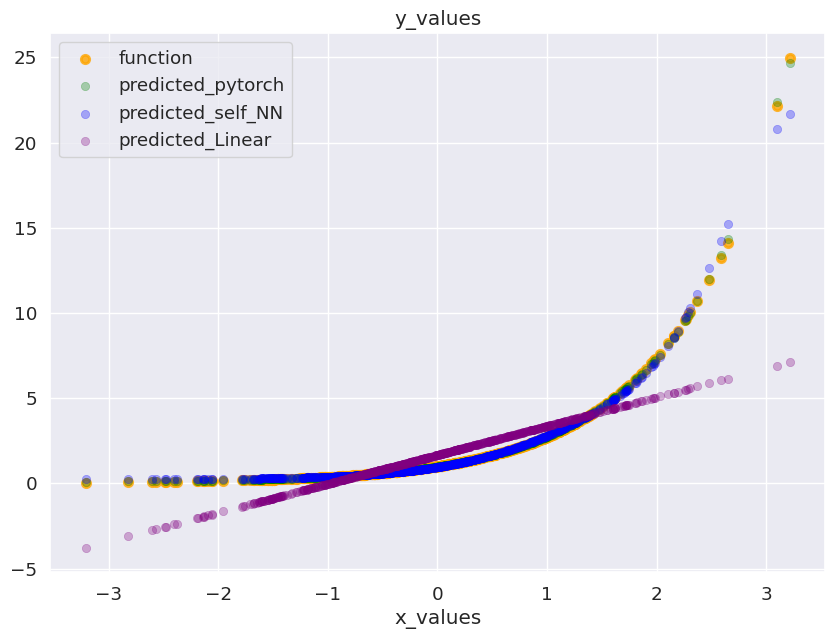

Pytorch Model MSE = 0.001
Self NN Model MSE = 0.027
Linear Model MSE = 1.874


In [99]:
show_result([y_pred_seq, y_pred_self, y_pred_linear], X_train, y_train, 'x_values', 'y_values',
            [loss_seq, loss_self, loss_linear])

Заметим, что лучше всего получилось приближение при использовании nn.Sequential. Хуже всего получилась линейная регрессия, так как мы не пытались добавить колонок с нелинейными признаками(в чате написали, что не надо).

Визуализируйте предсказания данных моделей и посчитайте MSE на тестовой части данных.

Для pytorch модели:

In [100]:
with torch.no_grad():
    y_pred_seq = model(X_test)

loss_seq = optim_func(y_pred_seq, y_test)

Для написанной самостоятельно нейронной сети:

In [102]:
y_pred_self = torch.from_numpy(model2_exp.predict(X_test))
loss_self = optim_func(y_pred_self, y_test)

Для линейной регрессии:

In [103]:
y_pred_linear = torch.from_numpy(model_lin_exp.predict(X_test.numpy()))
loss_linear = optim_func(y_pred_linear, y_test)

Теперь посмотрим на предсказания моделей на одном графике

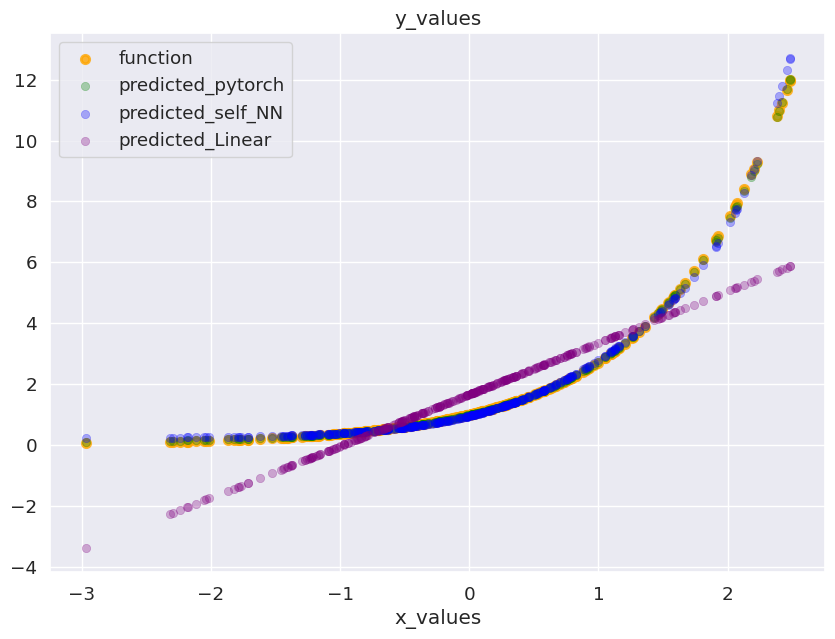

Pytorch Model MSE = 0.000
Self NN Model MSE = 0.011
Linear Model MSE = 1.416


In [104]:
show_result([y_pred_seq, y_pred_self, y_pred_linear], X_test, y_test, 'x_values', 'y_values',
            [loss_seq, loss_self, loss_linear])

Повторите вычисления для другой нелинейной функции $y(x)$.

In [105]:
sample_size = int(1e3)
X = sps.norm.rvs(size=(sample_size, 1))
y = np.squeeze(X*np.sin(X))

assert y.shape == (sample_size,)

Теперь посмотрим на более сложную функцию: sin(x)*x. Так как со стороны кажется, что она идеально не приблизится

In [106]:
X_new = torch.from_numpy(X).reshape(-1, 1)
X_new = X_new.to(torch.float32)
y_new = torch.from_numpy(y).reshape(-1, 1)
y_new = y_new.to(torch.float32)
X_new.shape, y_new.shape

(torch.Size([1000, 1]), torch.Size([1000, 1]))

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.33, random_state=42)

Обучим вначале pytorch модель. Также для разнообразия возьмем в качестве оптимайзера SGD, а не Adam

In [108]:
model_sin = nn.Sequential(
    nn.Linear(in_features=1, out_features=2),
    nn.Sigmoid(),
    nn.Linear(in_features=2, out_features=1)
)

In [109]:
optimizer = torch.optim.SGD([                                     # using SGD optimizer
                {'params': [model_sin[0].weight, model_sin[2].weight]},
                {'params': [model_sin[0].bias, model_sin[2].bias], 'lr': 0.05}
            ], lr=0.07)
scheduler = MultiStepLR(optimizer, milestones=[1000, ], gamma=0.1)   # reduce lr by 0.1 after 1000 epochs

optim_func = nn.MSELoss()

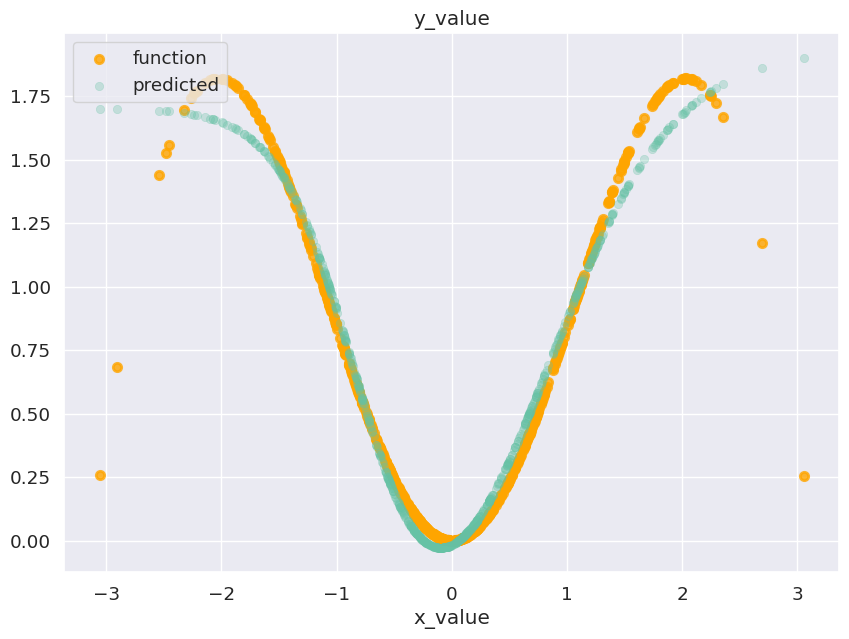

MSE = 0.014


In [112]:
model_sin = learning(model_sin, optimizer, optim_func, X_train, y_train, 10000)

Обучим написанную самостоятельно сетку:

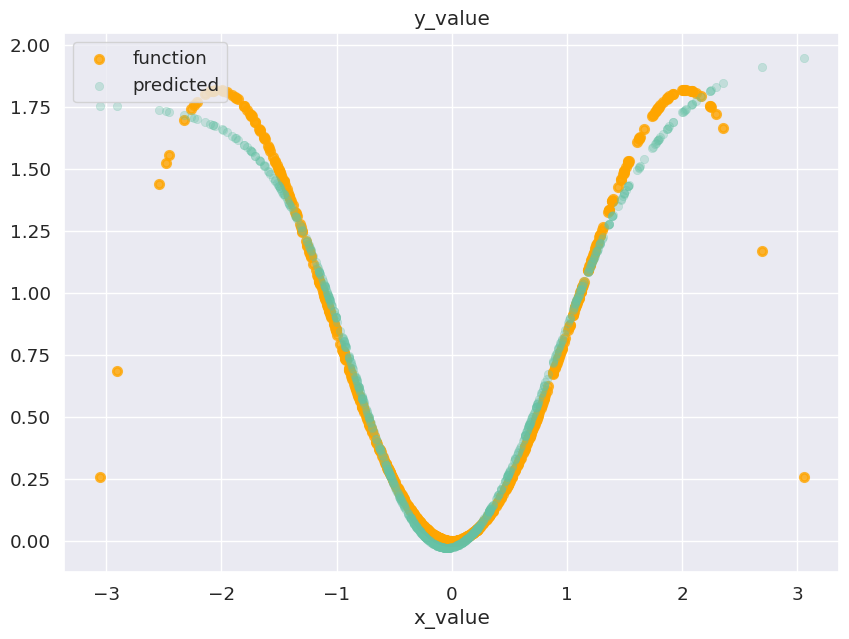

MSE = 0.013


In [113]:
model2_sin = SimpleNeuralNetwork(learning_rate=0.04)

model2_sin.fit(X_train.numpy(), y_train.numpy(), epochs = 10000)

Обучим линейную регрессию:

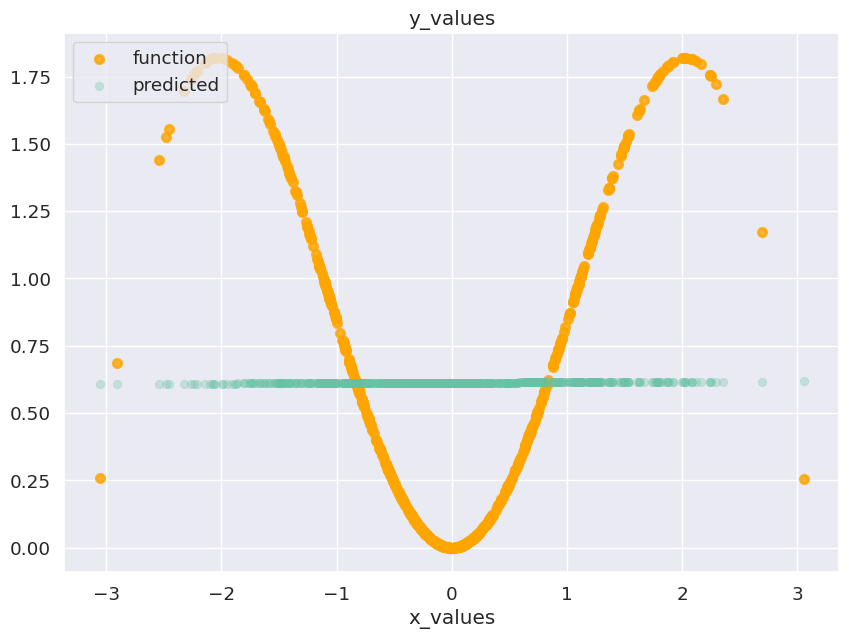

MSE = 0.345


In [114]:
model_lin_sin = LinearRegression().fit(X_train.numpy(), y_train.numpy())

y_pred = torch.from_numpy(model_lin_sin.predict(X_train.numpy()))
loss = optim_func(y_pred, y_train)

show_progress(X_train, y_train, y_pred, 'x_values', 'y_values', loss)

Теперь выведем MSE и графики на тестовой части выборки:

Для pytorch модели:

In [115]:
with torch.no_grad():
    y_pred_seq = model_sin(X_test)

loss_seq = optim_func(y_pred_seq, y_test)

Для написанной самостоятельно нейронной сети:

In [116]:
y_pred_self = torch.from_numpy(model2_sin.predict(X_test))
loss_self = optim_func(y_pred_self, y_test)

Для линейной регрессии:

In [117]:
y_pred_linear = torch.from_numpy(model_lin_sin.predict(X_test.numpy()))
loss_linear = optim_func(y_pred_linear, y_test)

Общий график на тестовой выборке:

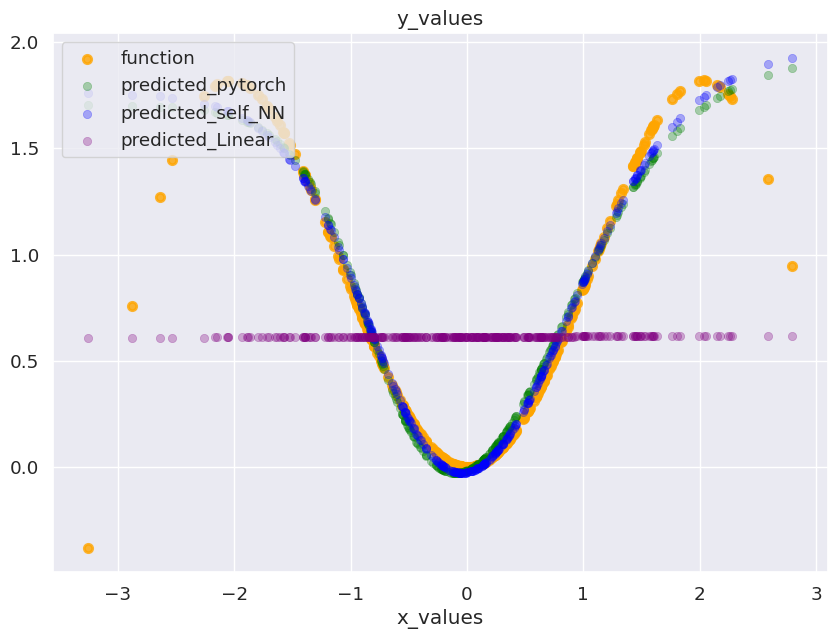

Pytorch Model MSE = 0.024
Self NN Model MSE = 0.024
Linear Model MSE = 0.349


In [118]:
show_result([y_pred_seq, y_pred_self, y_pred_linear], X_test, y_test, 'x_values', 'y_values',
            [loss_seq, loss_self, loss_linear])

**Вывод:**\
1) По сравнению линейной регрессии с нейронными сетями видно, что они намного лучше приближают сложные зависимости(в линейной регрессии можно добавить колонки с нелинейными признаками, но исходя из того, что зависимость мы не знаем, угадать сложную функцию будет тяжело)\
2) Но для обучения нейронной сети приходится подбирать learning rate, чтобы она побыстрее обучалась и при этом, чтобы в конце она не проскакивала минимум(мне помог scheduler = MultiStepLR(...))\
3) Также при обучении на маленьких итерациях видно сигмоиду, растягивающуюся линейно и вертикально(из-за того, что функция активации сигмоида, а нейронов в скрытом слое всего 2)\
4) Если сравнивать написанную самостоятельно сетку с реализацией в pytorch, то можно заметить, что полуилось не сильно хуже(на второй функции Loss у нее даже меньше, чем у модели из pytorch)\
5) Для увеличения скорости обучения мне помог SGD в обоих случаях(в написанной самостоятельно - обучение по случайным батчам, а в pytorch - соответствующий optimizer)\
6) Для сложной функции видно, что сетки справились с задачей сильно хуже, чем с exp(x). Если мы посмотрим на теорему Цыбенко(см лекцию), то там сказано, что любую непрерывную функцию(т.е. sin(x)*x подходит) можно приблизить двухслойной сетью с функцией - сигмоидой(существует какое-то H - размер скрытого слоя). Но мы берем в наших моделях H = 2, поэтому непрерывная функция может и не приблизиться сеткой из 1 задачи